# Experimentos con Dataset VGGish Embeddings
## Adrián Arnaiz
> * Ruta: */ser/CaracteristicasExtraidas/vggish/embeddings*
* Módulo de carga de datos: */src/cargaDatosVggishEmbeddings.py*
     * Cada uno Contiene load_....py siendo ... todos los conjuntos de datos extraidos para las características extraídas para read text y vocales con vggis. Ejemplo: load_vggish_embed_v_A() o load_vggish_embed_rt()

**Comentar un poco resultados y conclusiones finales**
* **Para los embeddings:**
 * Para los experimentos normales, lo que mejor funciona es A_embeddings y rt-embeddings con los MLP y GBC. No hay mejora significativa, pero están en el orden de los 'mejores' obtenidos anteriormente para este experimento: 0.78 accuracy 0.88 roc_auc. Mejores resultados normalizando.
  * **Mejor experimento: MLP 10 neuronas: 0.888** 

<a id="index"></a>
## Índice del notebook
1. [Experimentos Embeddings](#rep)
 1. [Experimentos estandar - Experimenter](#exp)
    1. [Accuracy - atribs. por defecto](#acudef)
    2. [Accuracy - atribs. normalizados](#acunorm)
    3. [AUC - atribs. por defecto](#aucdef)
    4. [Accuracy - atribs. normalizados](#aucnorm)
 5. [Grid-Search \ SVM $\rightarrow$ Orozco](#gssvm)
    1. [|Apartado Formativo| Recalcar importancia de búsqueda de parámetros.](#GSfrom)
 6. [Variance Treshold](#vtres)
 7. [SKBest](#skbest)
 8. [! Grid Search \ VarianceTeshold + AdaBoost](#vtab)
 9. [Grid Search \ Seleckt KBest + RF](#skrf)
 9. [! Grid Search \ Seleckt KBest + AdaBoost](#skada)
 9. [Grid Search \ Seleckt KBest + GBC](#skgbc)
 9. [Grid Search \ Seleckt KBest + MLP](#MLP)

 ----------------------

In [0]:
import cargaDatosVggishEmbeddings

from experimenter import *
from IPython.display import clear_output
import numpy as np
import os
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold

from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')

# 1. Experimentos Embeddings VGGish <a id="rep"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Repetiremos el conjuto de experimentos que hemos ido realizando para todos los anteriores conjuntos de datos y así poder comparar resultados.

**Experimenter.GridSearchPipe(moduloDeDatos, pipe, paramgrid, verbose=True, normalizar=True): utiliza ROC_AUC**


## 1.1 Experimentos estandar - Experimenter <a id="exp"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Hemos añadido el perceptron multicapa respecto a otros experimentos. sklearn.neural_network.MLPClassifier.

In [0]:
tipoDatos = "cargaDatosVggishEmbeddings"
general = {
    "ID":"ExperimentoBase",
    "N_FOLDS":10
}

datasets = [
    {
        "ID_DATA":"RT_Embedding",
        "ORIGIN": tipoDatos+".load_vggish_embed_rt",
    },
    {
        "ID_DATA":"A_Embedding",
        "ORIGIN": tipoDatos+".load_vggish_embed_v_A",
    },
    {
        "ID_DATA":"E_Embedding",
        "ORIGIN": tipoDatos+".load_vggish_embed_v_E",
    },
    
    
    {
        "ID_DATA":"I_Embedding",
        "ORIGIN":tipoDatos+".load_vggish_embed_v_I",
    },
    {
        "ID_DATA":"O_Embedding",
        "ORIGIN":tipoDatos+".load_vggish_embed_v_O",
    },
    {
        "ID_DATA":"U_Embedding",
        "ORIGIN":tipoDatos+".load_vggish_embed_v_U",
    }
]

algoritmos = [
    {
        "ID_ALG":"KNN8",
        "ALGO": "sklearn.neighbors.KNeighborsClassifier",
        "PARAMS":{
            "n_neighbors":8,
            "metric":"euclidean"
        }
    },
    {
        "ID_ALG":"Tree",
        "ALGO": "sklearn.tree.DecisionTreeClassifier",
        "PARAMS":{  # Parámetros por defecto       
        }
    },
    {
        "ID_ALG":"Bayes",
        "ALGO": "sklearn.naive_bayes.GaussianNB",
        "PARAMS":{  # Parámetros por defecto       
        }
    },
    {
        "ID_ALG":"SVM",
        "ALGO": "sklearn.svm.SVC",
        "PARAMS":{
        }
    },
    {
        "ID_ALG":"RandomF",
        "ALGO": "sklearn.ensemble.RandomForestClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"Ada",
        "ALGO": "sklearn.ensemble.AdaBoostClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"Reglas",
        "ALGO": "sklearn.dummy.DummyClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"GBC",
        "ALGO": "sklearn.ensemble.GradientBoostingClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"MLP100",
        "ALGO": "sklearn.neural_network.MLPClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"MLP10",
        "ALGO": "sklearn.neural_network.MLPClassifier",
        "PARAMS":{ "hidden_layer_sizes":10
        }
    },
    
]

output = {
    "METRIC":"accuracy",
    "DISPLAY":"table"
}

experimento = {
    "GENERAL":general,
    "DATASETS":datasets,
    "ALGORITMOS":algoritmos,
    "OUTPUT": output    
}

### 1.1.1 Acuracy -  atribs sin modificar <a id="acudef"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejor: **RF, ADA, GBC y MLP para rt_embeddings, A_embeddings y E_embeddings**: **0.730.74**. 0 por encima del 0.8.

**NO** hay mejora significativa ni debido a las nuevas características. Bastante malos resultados comparados con el estado del arte.

In [0]:
warnings.filterwarnings('ignore')
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [0]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC,MLP100,MLP10
RT_Embedding,0.530000,0.540000,0.690000,0.460000,0.670000,0.610000,0.470000,0.690000,0.640000,0.550000
A_Embedding,0.684048,0.634286,0.673571,0.638333,0.631429,0.731667,0.543095,0.735000,0.728095,0.734524
E_Embedding,0.638202,0.560722,0.575131,0.503448,0.591773,0.676757,0.528555,0.690558,0.729007,0.715673
I_Embedding,0.661750,0.557631,0.623203,0.505300,0.594007,0.566580,0.455774,0.601783,0.694536,0.708461
O_Embedding,0.580667,0.553459,0.604205,0.507556,0.557162,0.599897,0.542336,0.629954,0.631436,0.646963
U_Embedding,0.623077,0.595231,0.578769,0.512000,0.560308,0.614308,0.496000,0.689385,0.634615,0.638154
MEDIA,0.619624,0.573555,0.624147,0.521106,0.600780,0.633201,0.505960,0.672780,0.676281,0.665629


In [0]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.2 Acuracy -  atribs normalizados <a id="acunorm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejor resultado: rt_embeddings con MLP. Los 3 mejores:  MLPs, GBC y ADA. **(0.78 rt_embeddings con MLP100.)**. 0 por encima del 0.8. Resultados en la tónica de los obtenidos conresultados anteriores.

In [0]:
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento, True) #Normalizamos
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [0]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC,MLP100,MLP10
RT_Embedding,0.700000,0.530000,0.580000,0.690000,0.730000,0.610000,0.540000,0.690000,0.770000,0.780000
A_Embedding,0.637857,0.599048,0.659048,0.655952,0.635476,0.731667,0.513810,0.731429,0.716905,0.727857
E_Embedding,0.627241,0.591560,0.575123,0.654836,0.637578,0.676757,0.463801,0.673539,0.659614,0.708760
I_Embedding,0.680109,0.589774,0.616174,0.666306,0.594613,0.566580,0.554789,0.594887,0.655373,0.683707
O_Embedding,0.578137,0.561436,0.615459,0.569128,0.550456,0.599897,0.473094,0.607601,0.590125,0.616621
U_Embedding,0.607231,0.571692,0.555385,0.516615,0.587077,0.614308,0.476923,0.689538,0.618615,0.638308
MEDIA,0.638429,0.573918,0.600198,0.625473,0.622533,0.633201,0.503736,0.664499,0.668439,0.692542


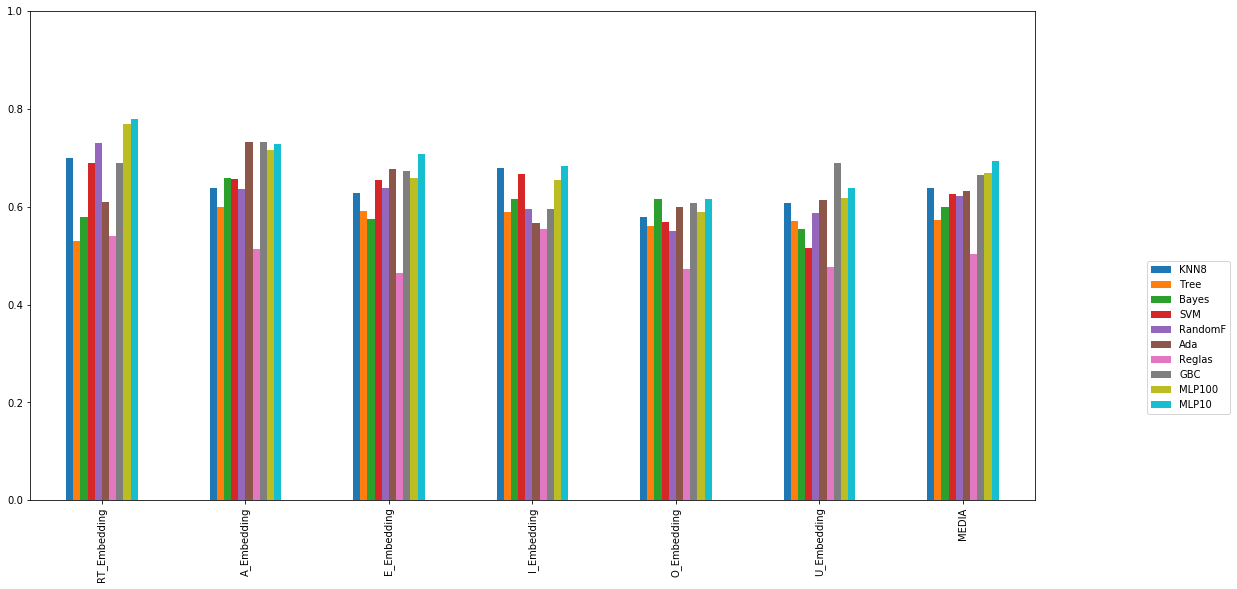

In [0]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.3 Auc - sin modificar <a id="aucdef"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
El que mejor funciona es A_embeddings por lo general. Los 2 mejores son MLP y GBC y GBC **(0.82 A_embeddings con MLP)**. 3 por encima del 0.8.

Resultados en torno a los obtenidos en anteriores experimentos pero sin llegar a los mejores (Ada-art_campana 0.88).

In [0]:
experimento['OUTPUT']['METRIC']='roc_auc'
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [0]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC,MLP100,MLP10
RT_Embedding,0.532000,0.540000,0.718000,0.472000,0.778000,0.620000,0.510000,0.716000,0.784000,0.684000
A_Embedding,0.770018,0.605952,0.755271,0.757732,0.721035,0.794465,0.481667,0.815317,0.812406,0.822215
E_Embedding,0.729506,0.567381,0.623388,0.720125,0.665957,0.707916,0.501667,0.741299,0.773229,0.762186
I_Embedding,0.754572,0.582967,0.672463,0.720416,0.649525,0.547093,0.490421,0.643276,0.723312,0.749419
O_Embedding,0.633090,0.573535,0.613088,0.675493,0.588652,0.639483,0.482234,0.671337,0.691934,0.713919
U_Embedding,0.693688,0.580769,0.642283,0.676183,0.632249,0.659418,0.535897,0.760256,0.676430,0.685848
MEDIA,0.685479,0.575101,0.670749,0.670325,0.672570,0.661396,0.500314,0.724581,0.743552,0.736265


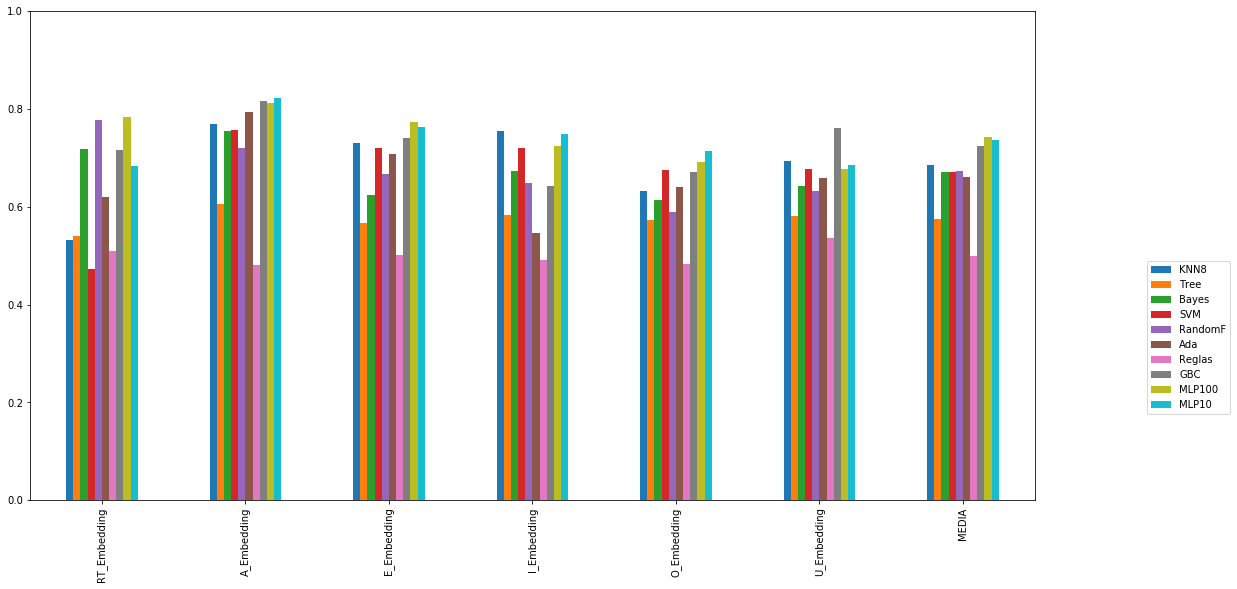

In [0]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.4  Auc - Normalizados <a id="aucnorm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Resultados mejores con los embeddings de read-text y de la vocal A, siempre con MLP, siguiendo la magnitud de los resultados de anteriores experimentos.

En este caso vemos como más clasificadores que antes  logran estar por encima del 0.8 AUC. 5 están por encima del 0.8. Mejor son MLP con diferencia y le sigue Gbc en algunos datasets.. Resultados del orden de los mejores: **(0.88 MLP-rt_embeddings)**, el mejor hasta ahora era GB-art_campana 0.89.


In [0]:
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento, True)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [0]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC,MLP100,MLP10
RT_Embedding,0.832000,0.590000,0.642000,0.792000,0.750000,0.620000,0.430000,0.704000,0.864000,0.888000
A_Embedding,0.740975,0.587619,0.752596,0.723646,0.781323,0.794465,0.496667,0.811433,0.792358,0.811039
E_Embedding,0.687884,0.567857,0.625180,0.684975,0.655927,0.707916,0.555714,0.736542,0.750295,0.752932
I_Embedding,0.748180,0.578956,0.674691,0.704053,0.686239,0.547093,0.483590,0.646677,0.713111,0.727734
O_Embedding,0.640557,0.553800,0.608481,0.647351,0.644576,0.639483,0.492857,0.682911,0.637884,0.671548
U_Embedding,0.663141,0.588462,0.643319,0.647880,0.638609,0.659418,0.496474,0.754882,0.691371,0.673176
MEDIA,0.718790,0.577782,0.657711,0.699984,0.692779,0.661396,0.492550,0.722741,0.741503,0.754071


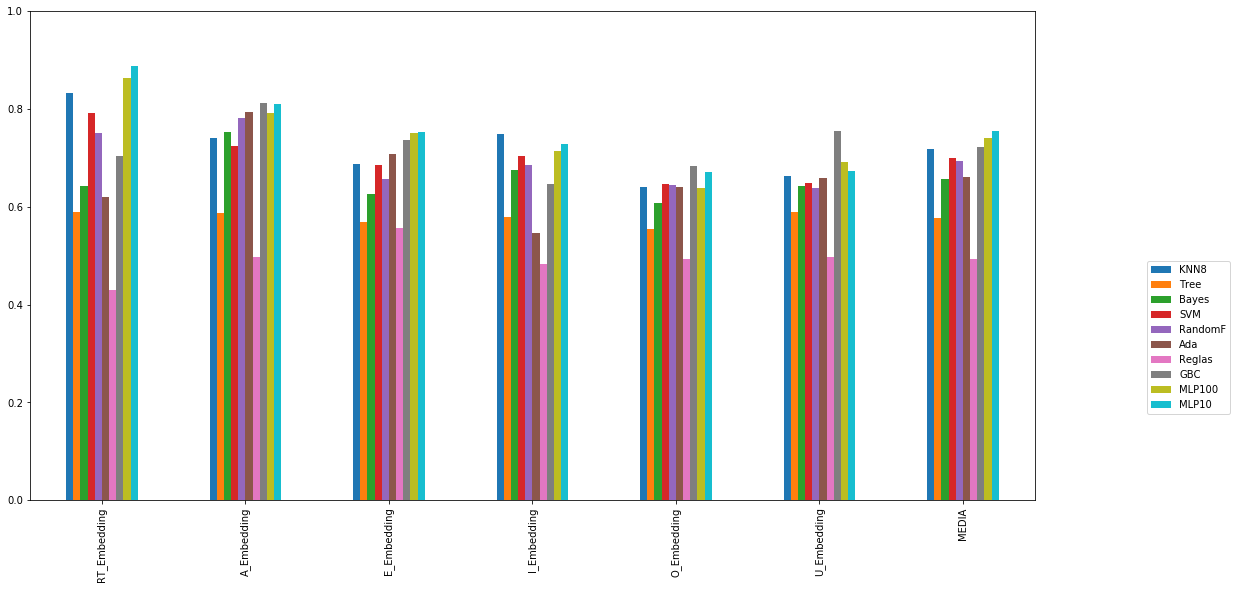

In [0]:
ex.process_results(all_results, data_names, model_names, 'bar')

---

## 1.2 Grid Search Orozco <a id="gssvm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
SCORING:AUC.  **Mejores resultados normalizando**.

[**Añadido otro cambio a función gridSearchPipe**
Se ha añadido la normalización al pipeline en vez de hacerla en todo el conjunto de datos X.
Añadimos al pipe o le creamos. Explicado en notebooks y clase:]

Los resultados obtenidos son **los mejores con este experimento hasta el momento**: Hemos añadido el valor 'auto' al parámetro gamma. Oroaszco no lo hace, pero consideramos que por esto ha sido la mejora de los resultados.

En anteriores experimentos solo se llegaba al 0.77 como mucho. **En este caso el mejor resultado se obtiene para los embeddings de read-text con un AUC de 0.876**

In [0]:
def best_to_panda(mej):
    return pd.DataFrame.from_dict(mej, orient='index',columns=['SCORE']).sort_values(by=['SCORE'], ascending=False)

In [0]:
ex = Experimenter()
param_grid = [
      {'C': [1,10,20,50,100,200,500,1000,5000,10000], 'kernel': ['rbf','linear'], 'gamma' : ['auto',1,10,20,50,100,200,500,1000]},
 ]

bestsOrz = ex.GridSearchPipe(cargaDatosVggishEmbeddings,svm.SVC(),param_grid, verbose=True, normalizar=True)
clear_output()

In [0]:
best_to_panda(bestsOrz)

,SCORE
vggish_embed_rt,0.876000
vggish_embed_v_A,0.834116
vggish_embed_v_E,0.741345
vggish_embed_v_I,0.741146
vggish_embed_v_U,0.683925
vggish_embed_v_O,0.646414


### 1.2.B [Apartado Formativo] Recalcar importancia de bísqueda de parámetros. <a id="GSfrom"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Compararemos los resultados para un dataset concreto con búsqueda de parámetros y con params por defecto.**Vemos como tiene un incremento de 7.6% en ROC** debido a la optimización de parámteros.

#### Busqueda de parametros

In [0]:
#Definimos pipeline y malla de parametros
param_grid = [
      {'clf__C': [1,10,20,100,500,1000,5000,10000], 'clf__kernel': ['rbf'], 'clf__gamma' : ['auto',1,10,20,50,200,1000]},
 ]
pip = Pipeline([('select', MinMaxScaler()), ('clf', svm.SVC())])


In [0]:
#Cargamos los datos
loader = cargaDatosVggishEmbeddings
conjunto = loader.load_vggish_embed_rt()
X = conjunto.data
y = conjunto.target

#Creamos el objeto gridSearch
clf = GridSearchCV(pip, cv=10, param_grid=param_grid, scoring = 'roc_auc')

In [0]:
#Calculamos roc, de esta manera hace nested-CV
cross_val_score(clf,X,y,cv=10,scoring='roc_auc').mean()

0.876

#### Calculo CV con parametros por defecto de SVC 
**Los parametros por defecto ya estaban en el param_grid (C=1, kernel=rbf, gamma='auto').** Por ello se supone que si ha optimizado parametros en el anterior caso, el anterior resultado deberá ser mejor o como mucho igual a este, en el caso de que los parámetros óptimos hayan sido los de por defecto.

In [0]:
#Definimos pipeline para hacer CVscore con valores por defecto SVC (C=1, kernel=rbf, gamma='auto')
pip = Pipeline([('select', MinMaxScaler()), ('clf', svm.SVC())])

#Cargamos los datos
loader = cargaDatosVggishEmbeddings
conjunto = loader.load_vggish_embed_rt()
X = conjunto.data
y = conjunto.target

In [0]:
cross_val_score(pip,X,y,cv=10,scoring='roc_auc').mean()

0.8

---

## 1.3 Variance Treshold <a id="vtres"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejor resultado: **MLP - rt_embeddings: 0.83**. Resultados normales en el orden de anteriores pero sin acercarse a los mejores resultados conseguidos hasta ahora en este experimento (0.88 - mujeres_w_campana).

In [0]:
modulo = cargaDatosVggishEmbeddings

In [0]:
def seleccion_atribs_pipe(modulo, selector, clsf):
    res=[]
    for dtst in [ d for d in dir(modulo) if d.startswith('load')]:
        datos = getattr(modulo, dtst)()
        X = datos.data
        y = datos.target
        params = 'chi2, k=19' if selector == 'SelectKBest' else ''
        estimators = [('norm',MinMaxScaler()),('feat_sel', eval(selector+'('+params+')')), ('clf', eval(clsf+'()'))]
        pipe = Pipeline(estimators)
        sc=cross_val_score(pipe, X, y, cv=10, scoring='roc_auc').mean()
        res.append(sc)
    return res

In [0]:
df_VT = pd.DataFrame(index=[ d[5:] for d in dir(modulo) if d.startswith('load')])
clasificadores = ['AdaBoostClassifier', 'GradientBoostingClassifier', 'svm.SVC', 'MLPClassifier']
for clf in clasificadores:
    res= seleccion_atribs_pipe(modulo, 'VarianceThreshold',clf)
    df_VT[clf[:7]]= pd.DataFrame(res,[ d[5:] for d in dir(modulo) if d.startswith('load')],columns=[clf[:7]])
df_VT

,AdaBoos,Gradien,svm.SVC,MLPClas
vggish_embed_rt,0.616000,0.708000,0.800000,0.832000
vggish_embed_v_A,0.794465,0.810610,0.725243,0.792853
vggish_embed_v_E,0.707916,0.735063,0.682902,0.728982
vggish_embed_v_I,0.547093,0.637561,0.700089,0.700831
vggish_embed_v_O,0.639483,0.669646,0.650028,0.628719
vggish_embed_v_U,0.659418,0.759221,0.650493,0.675345


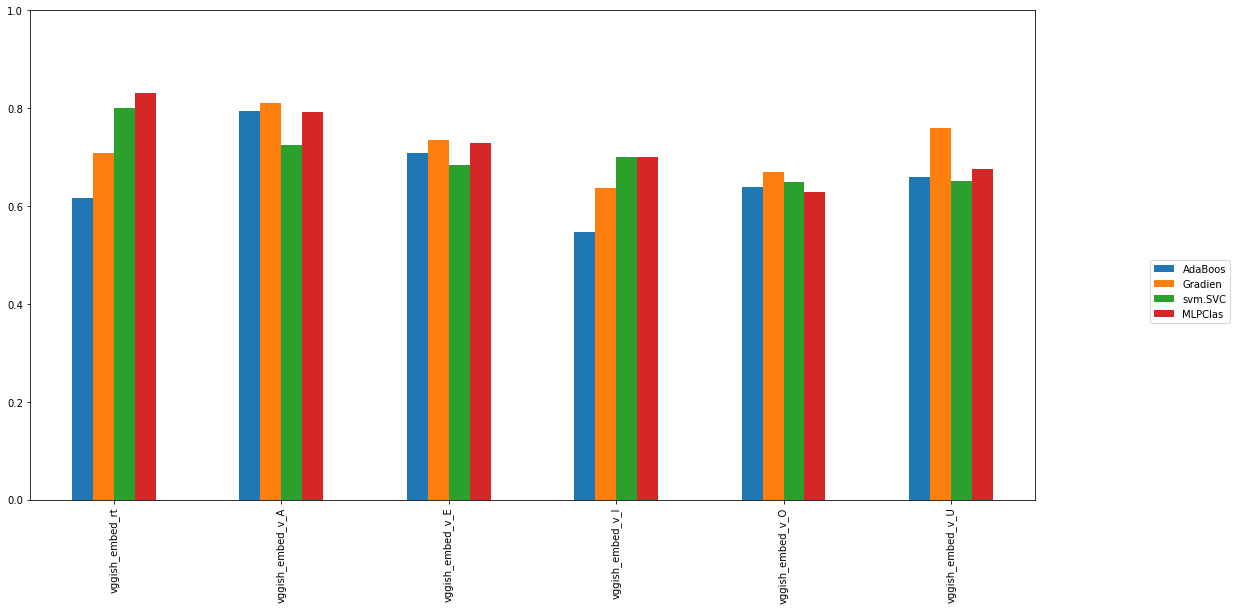

In [0]:
df_VT.plot(kind='bar', ylim=(0,1), figsize=(18,9)).legend(bbox_to_anchor=(1.2, 0.5))

---

## 1.4 SKBEST <a id="skbest"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejor resultado: **MLP - rt_embeddings: 0.76**. Resultados normales en el orden de anteriores pero sin acercarse a los mejores resultados conseguidos hasta ahora en este experimento (0.83 hombres_w_gat).

In [0]:
df_SK = pd.DataFrame(index=[ d[5:] for d in dir(modulo) if d.startswith('load')])
clasificadores = ['AdaBoostClassifier', 'GradientBoostingClassifier', 'svm.SVC', 'MLPClassifier']
for clf in clasificadores:
    res= seleccion_atribs_pipe(modulo, 'SelectKBest',clf)
    df_SK[clf[:7]]= pd.DataFrame(res,[ d[5:] for d in dir(modulo) if d.startswith('load')],columns=[clf[:7]])
df_SK

,AdaBoos,Gradien,svm.SVC,MLPClas
vggish_embed_rt,0.708000,0.696000,0.756000,0.760000
vggish_embed_v_A,0.713670,0.725973,0.703327,0.751912
vggish_embed_v_E,0.580938,0.627022,0.654508,0.626814
vggish_embed_v_I,0.526695,0.562779,0.657444,0.636188
vggish_embed_v_O,0.550472,0.541364,0.582453,0.582453
vggish_embed_v_U,0.632150,0.609665,0.598570,0.623077


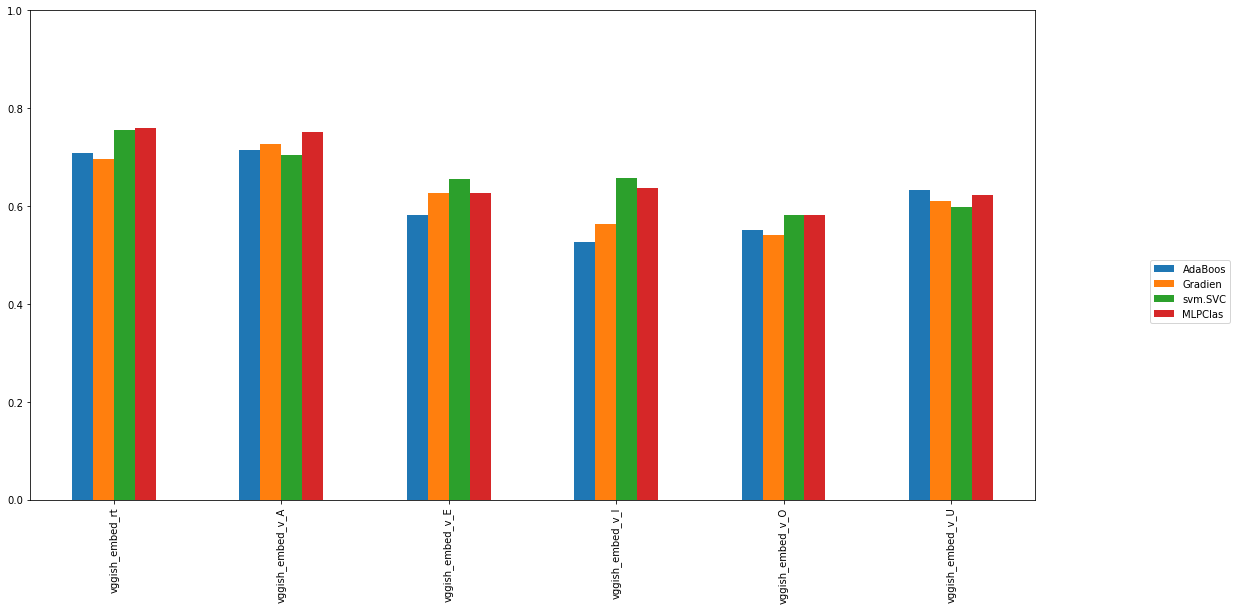

In [0]:
df_SK.plot(kind='bar', ylim=(0,1), figsize=(18,9)).legend(bbox_to_anchor=(1.2, 0.5))

---

## 1.5 Grid Search - Variance Treshold + AdaBoost <a id="vtab"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Resultados muy lejos de los normales y mejores en experiimentos anteriores. Con ccas disvoice se tenían resultados del orden de 0.8 altos incluso 0.9. Aquí los mejores tanto para normalizados como para no son **vggish_embed_v_E:0.740181 y vggish_embed_v_A:0.772177**. Ninguno por encima del 0.8.

##### Sin Normalizar 

In [0]:
modulo = cargaDatosVggishEmbeddings

In [0]:
ex = Experimenter()
param_grid = dict(select__threshold=[0.04, 0.03, 0.01])
                                     
pip = Pipeline([('select', VarianceThreshold()), ('clf', AdaBoostClassifier())])

bestsGsVtAda = ex.GridSearchPipe(modulo, pip, param_grid, verbose=False, normalizar=False)

In [0]:
best_to_panda(bestsGsVtAda)

,SCORE
vggish_embed_v_E,0.740181
vggish_embed_v_A,0.731957
vggish_embed_rt,0.720000
vggish_embed_v_U,0.667110
vggish_embed_v_O,0.639166
vggish_embed_v_I,0.631122


##### Normalizando

In [0]:
param_grid = dict(select__threshold=[0.05, 0.04, 0.03, 0.02, 0.01])
ex = Experimenter()
bestsGsVtAdaN = ex.GridSearchPipe(modulo, pip, param_grid,verbose=False, normalizar=True)

In [0]:
best_to_panda(bestsGsVtAdaN)

,SCORE
vggish_embed_v_A,0.772177
vggish_embed_v_E,0.706045
vggish_embed_v_U,0.665089
vggish_embed_rt,0.660000
vggish_embed_v_O,0.627444
vggish_embed_v_I,0.612844


-----------------------
## 1.6 Grid Search - Seleckt KBest + RF <a id="skrf"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Se obtienen peores resultados que con las ccas de Disvoice. El mejor resultado con Disvoice es 0.82 y aquí obtenermos el mejor resultado con **0.79 para embed_A y embed_rt**.

In [0]:
modulo = cargaDatosVggishEmbeddings

In [0]:
ex = Experimenter()
param_grid = dict(select__k=['all',10,15,22,50,100], clf__min_samples_leaf=[1,3,5,10], clf__max_depth=[5, None], clf__n_estimators=[10, 25, 40])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', RandomForestClassifier())])
bestsGsSkRfN = ex.GridSearchPipe(modulo, pip, param_grid,verbose=True, normalizar=True)
best_to_panda(bestsGsSkRfN)

In [0]:
best_to_panda(bestsGsSkRfN)

,SCORE
vggish_embed_rt,0.798000
vggish_embed_v_A,0.795609
vggish_embed_v_I,0.689516
vggish_embed_v_E,0.677944
vggish_embed_v_U,0.640015
vggish_embed_v_O,0.603755


---

## 1.7 Grid Search - Seleckt KBest + AdaBoost <a id="skada"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Se obtienen resultados bastante peores que en las ccas de Disvoice donde llegabamos hasta el 0.9 en el caso de las mujeres. En este caso el mejor resultado es **0.765 para embed_A**.

In [0]:
modulo = cargaDatosVggishEmbeddings

In [0]:
ex = Experimenter()
param_grid = dict(select__k=['all',10,15,22,50,100])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', AdaBoostClassifier())])
bestsGsSkADAN = ex.GridSearchPipe(modulo, pip, param_grid,verbose=True, normalizar=True)

In [0]:
best_to_panda(bestsGsSkADAN)

,SCORE
vggish_embed_v_A,0.764915
vggish_embed_v_E,0.707916
vggish_embed_rt,0.668000
vggish_embed_v_U,0.647978
vggish_embed_v_O,0.625690


---

## 1.8 Grid Search - Seleckt KBest + GBC<a id="skgbc"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Tampoco llegamos a batir los resultados obtenidos anteriormente con Disvoice. El mejor resultado en este caso es **embed_A 0.805**.

In [0]:
modulo = cargaDatosVggishEmbeddings

In [0]:
ex = Experimenter()
param_grid = dict(select__k=['all',10,15,22,50,100])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', GradientBoostingClassifier())])
bestsGsSkGBCN = ex.GridSearchPipe(modulo, pip, param_grid,verbose=True, normalizar=True)

In [0]:
best_to_panda(bestsGsSkGBCN)

,SCORE
vggish_embed_v_A,0.804766
vggish_embed_rt,0.744000
vggish_embed_v_E,0.737011
vggish_embed_v_U,0.709467
vggish_embed_v_O,0.673788


---

## 1.9 Grid Search - MLP<a id="MLP"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Encontramos los mejores resultados para **vggish_embed_rt :0.856**. Es un resultado del orden de los altos que nos hemos encontrado en los experimentos pero sin llegar al mejor.

In [0]:
modulo = cargaDatosVggishEmbeddings

In [5]:
ex = Experimenter()
param_grid = dict(select__k=['all',15,100], clf__hidden_layer_sizes=[10,50,100], clf__learning_rate =['constant', 'adaptive'], clf__learning_rate_init=[0.001,0.005], clf__tol=[1e-4,1e-3])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', MLPClassifier())])
bestsMLP = ex.GridSearchPipe(modulo, pip, param_grid,verbose=True, normalizar=True)


------------------------
Dataset: vggish_embed_rt
Score: 0.8560000000000001

------------------------
Dataset: vggish_embed_v_A
Score: 0.8086530612244898

------------------------
Dataset: vggish_embed_v_E
Score: 0.724625850340136

------------------------
Dataset: vggish_embed_v_I
Score: 0.7086708529565672

------------------------
Dataset: vggish_embed_v_O
Score: 0.618082558467174

------------------------
Dataset: vggish_embed_v_U
Score: 0.6859960552268245


In [6]:
best_to_panda(bestsMLP)

,SCORE
vggish_embed_rt,0.856000
vggish_embed_v_A,0.808653
vggish_embed_v_E,0.724626
vggish_embed_v_I,0.708671
vggish_embed_v_U,0.685996
vggish_embed_v_O,0.618083
